# LIVE CODING SEABORN

In [1]:
# Generate a Dataframe
import string
import numpy as np
import pandas as pd

letters = ['TRIAL', 'STANDARD', 'PREMIUM']
account = [np.random.choice(letters) for i in range(0, 100)]
values = np.random.randn(100)
access = np.random.randint(10, 100, 100)

users = pd.DataFrame({
    'ACCOUNT_TYPE': account,
    'ACCOUNT_VALE': values,
    'ACCOUNT_ACCESS': access
})

users.head()

,ACCOUNT_TYPE,ACCOUNT_VALE,ACCOUNT_ACCESS
0,PREMIUM,-0.748793,22
1,PREMIUM,0.590610,62
2,PREMIUM,1.801726,77
3,PREMIUM,0.344536,66
4,PREMIUM,-1.056065,48


In [2]:
users.describe()

,ACCOUNT_VALE,ACCOUNT_ACCESS
count,100.000000,100.000000
mean,0.032327,56.770000
std,1.146276,25.617566
min,-2.831718,10.000000
25%,-0.911264,36.000000
50%,0.313779,54.500000
75%,0.863922,78.250000
max,1.892261,99.000000


In [3]:
(users.ACCOUNT_TYPE.value_counts() / len(users)) * 100

PREMIUM     45.0
STANDARD    33.0
TRIAL       22.0
Name: ACCOUNT_TYPE, dtype: float64

**Seaborn** acts as a high-level interface to **Matplotlib** for data visualization, it specializes in plotting more easily and with less code than Matplotlib.

The specialty of this library is based on the generation of statistical graphs, although the main functionalities that we can find are:
* An API aimed at finding relationships between multiple variables in a data set.
* Great support dedicated to categorical variables to display their statistics.
* Ability to compare different types of distributions.
* Automatic estimation and visualization of linear regression.
* Possibility of obtaining the multiple facets of a variable.

NOTE: It is recommended to have pandas imported to be able to perform operations on the data sets in addition to visualization. It is also recommended to always work together with pyplot

Import the libraries

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

The first thing we are going to do is show the simplicity of seaborn through a point cloud plot and its linear regression. We carry out this action with a single function <code>**lmplot**</code>, the main parameters that the function will need are **x**, **y**, **data**

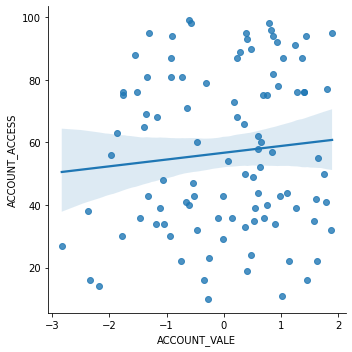

In [5]:
sns.lmplot(x="ACCOUNT_VALE", y = 'ACCOUNT_ACCESS', 
           data = users)

One of the curiosities of Seaborn is that, being of a high level, it integrates several functions at the same time, in the previous graph we see 3, point cloud, adjustment line and the smooth, however, to paint only a point cloud , we have to disable parameters, in this case **fit_reg** takes True or False values, we disable it.

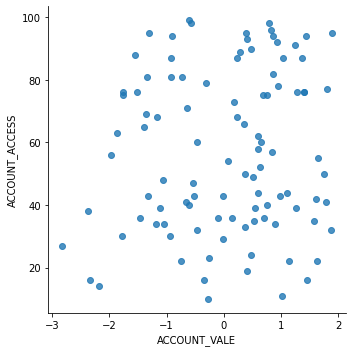

In [6]:
sns.lmplot(x="ACCOUNT_VALE", y = 'ACCOUNT_ACCESS', 
           data = users, fit_reg = False)

In a similar way to ggplot, we can show the color of the graph based on another variable, in this case, we are going to show the color by the 3 levels of the ACCOUNT_TYPE variable, to show the color we use the parameter **hue**

C:\Users\JMMoreno\Anaconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


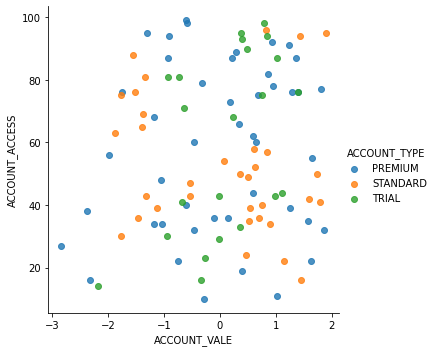

In [7]:
sns.lmplot(x="ACCOUNT_VALE", y = 'ACCOUNT_ACCESS', 
           data = users, hue = 'ACCOUNT_TYPE', 
           fit_reg=False, legend=True, legend_out=True)

### Question.

If now in the visualization above, we re-add `fit_reg=True`, how will the linear regression be performed?

Some chart types don't take required x and y parameters, so we can pass the entire dataset.

<AxesSubplot:>

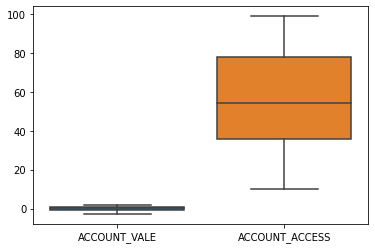

In [8]:
sns.boxplot(data=users)

<AxesSubplot:>

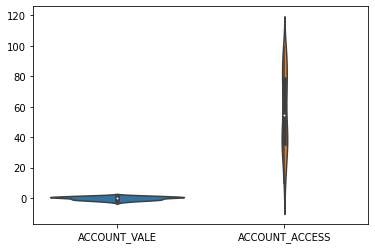

In [9]:
sns.violinplot(data=users)

However, we can always define the data sets that we want to display on the chart.

<AxesSubplot:xlabel='ACCOUNT_TYPE', ylabel='ACCOUNT_ACCESS'>

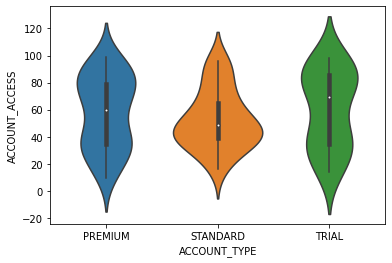

In [10]:
sns.violinplot(x=users.ACCOUNT_TYPE, 
               y=users.ACCOUNT_ACCESS, 
               data=users)

We can also define our own color type. We simply have to pass a list with the values to the parameter **palette**

<AxesSubplot:xlabel='ACCOUNT_TYPE', ylabel='ACCOUNT_ACCESS'>

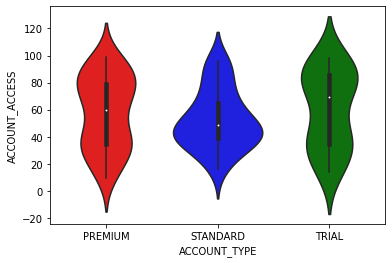

In [11]:
sns.violinplot(x=users.ACCOUNT_TYPE, 
               y=users.ACCOUNT_ACCESS, 
               data=users,
               palette=['red', 'blue', 'green'])

A very important feature of Seaborn is that it allows us to overlap graphs with each other, we are going to use our previous boxplot and we will add another type of graph that shows the dispersion of the points reflecting the structure of a boxplot, we will use <code>**swarmplot** </code>

<AxesSubplot:xlabel='ACCOUNT_TYPE', ylabel='ACCOUNT_ACCESS'>

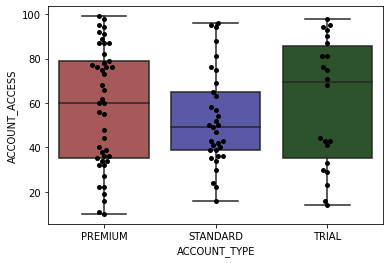

In [12]:
sns.boxplot(x=users.ACCOUNT_TYPE, 
            y=users.ACCOUNT_ACCESS, 
            data=users,
            palette=['red', 'blue', 'green'],
            saturation=0.3)

sns.swarmplot(x=users.ACCOUNT_TYPE, 
              y=users.ACCOUNT_ACCESS, 
              data=users, 
              color='k')

Some colors that we can use in Seaborn: https://www.codecademy.com/article/seaborn-design-ii

<AxesSubplot:xlabel='ACCOUNT_TYPE', ylabel='ACCOUNT_ACCESS'>

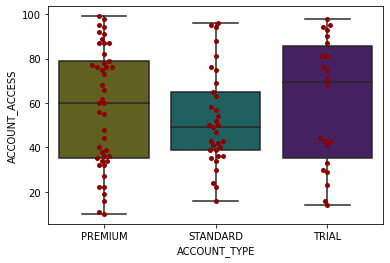

In [13]:
sns.boxplot(x=users.ACCOUNT_TYPE, 
            y=users.ACCOUNT_ACCESS, 
            data=users,
            palette=['olive', 'teal', 'indigo'],
            saturation=0.5)

sns.swarmplot(x=users.ACCOUNT_TYPE, 
              y=users.ACCOUNT_ACCESS, 
              data=users, 
              color='darkred')

We can add titles and text for the x and y axes just like with pyplot.

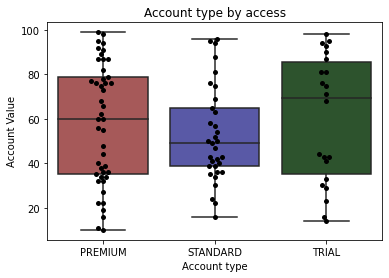

In [14]:
sns.boxplot(x=users.ACCOUNT_TYPE, 
            y=users.ACCOUNT_ACCESS, 
            data=users,
            palette=['red', 'blue', 'green'],
            saturation=0.3)

sns.swarmplot(x=users.ACCOUNT_TYPE, 
              y=users.ACCOUNT_ACCESS, 
              data=users, 
              color='k')

plt.title('Account type by access')
plt.xlabel('Account type')
plt.ylabel('Account Value')
plt.show()

Also, we can update the fig size with the parameters of subplots

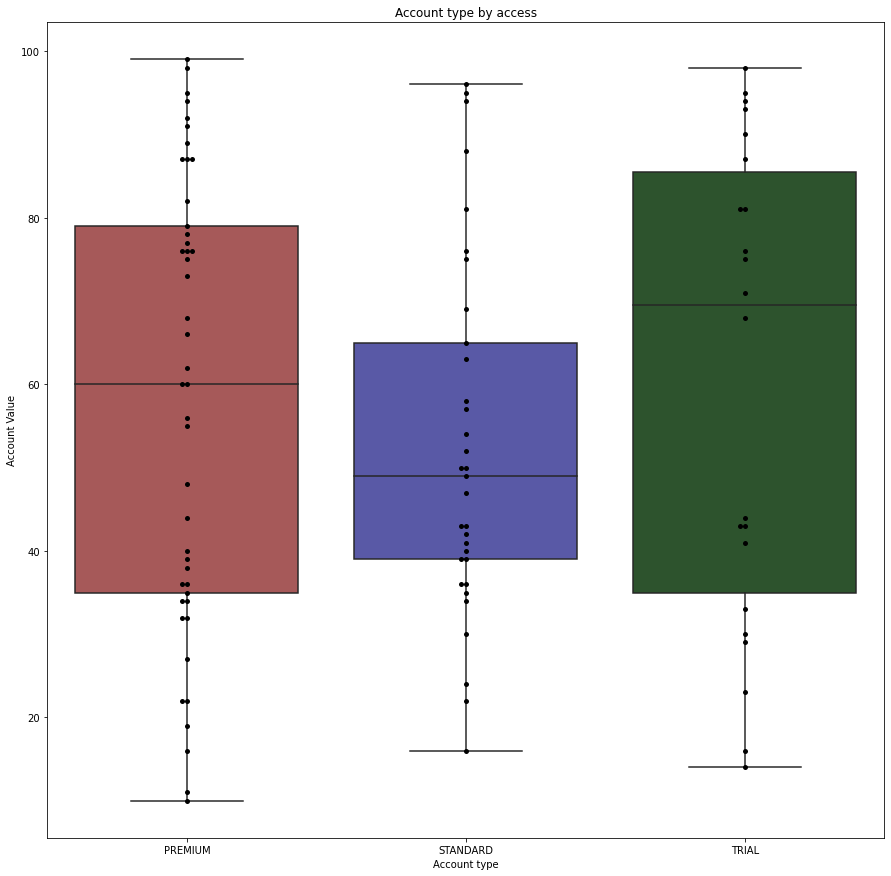

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

sns.boxplot(x=users.ACCOUNT_TYPE, 
            y=users.ACCOUNT_ACCESS, 
            data=users,
            palette=['red', 'blue', 'green'],
            saturation=0.3)

sns.swarmplot(x=users.ACCOUNT_TYPE, 
              y=users.ACCOUNT_ACCESS, 
              data=users, 
              color='k')

plt.title('Account type by access')
plt.xlabel('Account type')
plt.ylabel('Account Value')
plt.show()

As we have mentioned before, being a high-level library, it integrates different operations on the same graph. We will see in the following example with <code>**histplot**</code> how to effortlessly make a histogram and a density plot at the same time.

<AxesSubplot:xlabel='ACCOUNT_ACCESS', ylabel='Count'>

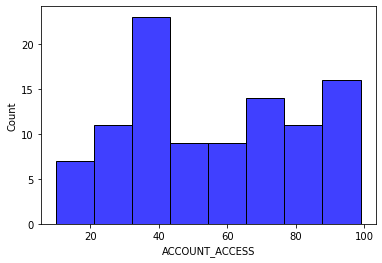

In [16]:
sns.histplot(data=users.ACCOUNT_ACCESS, color='blue')

### Question:

About the previous representation, how can we enable the curve with the density function?

Another feature of Seaborn is to be able to represent graphically in a simple way the frequency of the variables with <code>**countplot**</code>

<AxesSubplot:xlabel='ACCOUNT_TYPE', ylabel='count'>

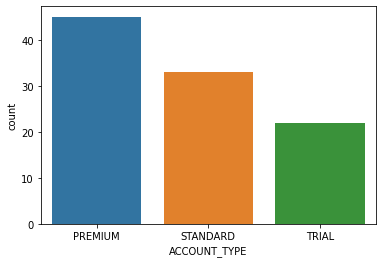

In [17]:
sns.countplot(x='ACCOUNT_TYPE', data=users)

As with ggplot, we can also perform *faceting* and display sub-plots for each value of a variable, whether categorical or numeric. The function in charge to carry out this action is <code>**catplot**</code>

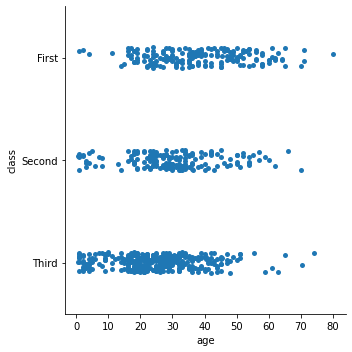

In [18]:
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")

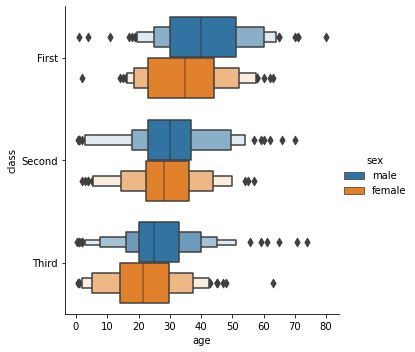

In [19]:
sns.catplot(data=df, x="age", y="class", hue="sex", kind="boxen")

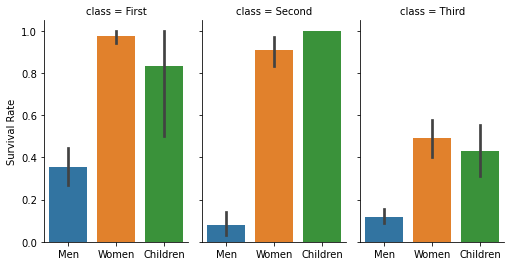

In [20]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])

Another important feature also mentioned at the beginning of the content is that Seaborn is integrated with several pandas functions, in this case, we will make a visualization based on a correlation matrix with <code>**heatmap**</code>.

Since we have very few numeric variables in our dataset, we are going to generate a few more.

Note: It is recommended to see the following link to know the different color maps with: https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

In [21]:
users.columns

Index(['ACCOUNT_TYPE', 'ACCOUNT_VALE', 'ACCOUNT_ACCESS'], dtype='object')

In [22]:
new_df = users.copy()

new_df['SQUARE'] = new_df.ACCOUNT_VALE**2
new_df['CUBIC'] = new_df.ACCOUNT_VALE**3
new_df['NEW_INTS_1'] = np.random.randint(10, 100, 100)
new_df['NEW_INTS_2'] = np.random.randint(10, 100, 100)

<AxesSubplot:>

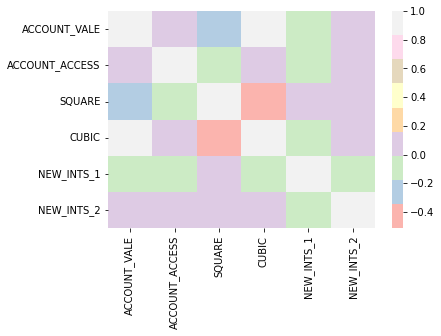

In [23]:
sns.heatmap(new_df.corr(), cmap='Pastel1')

<AxesSubplot:>

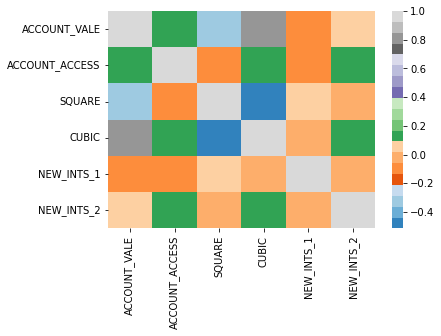

In [24]:
sns.heatmap(new_df.corr(), cmap='tab20c')

<AxesSubplot:>

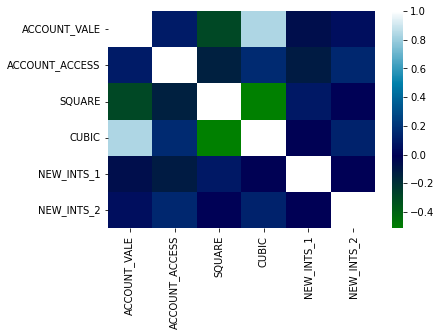

In [25]:
sns.heatmap(new_df.corr(), cmap='ocean')

We can also display the exact value of the correlation into the heatmap

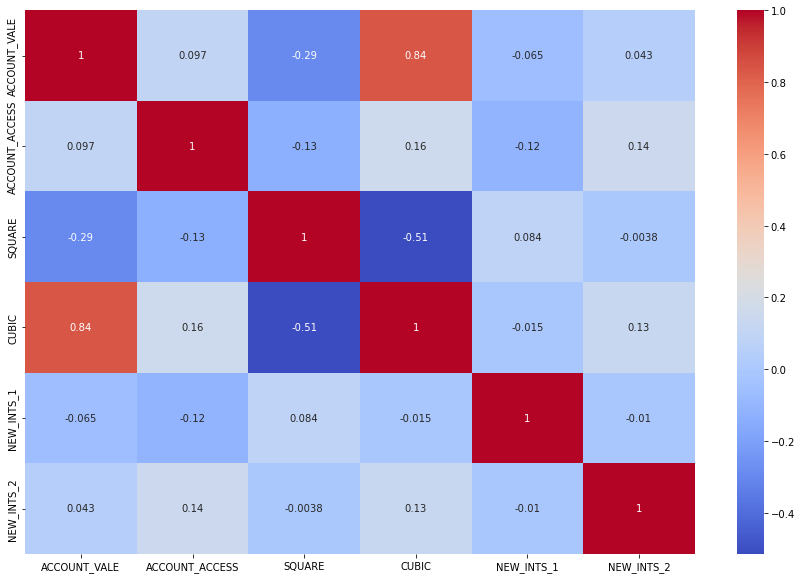

In [26]:
import matplotlib.pyplot as plt

# Increase fig size using matplotlib
fig, ax = plt.subplots(figsize=(15,10))
 

sns.heatmap(new_df.corr(), cmap='coolwarm', annot=True, ax=ax, fmt='.2g')
plt.show()

Seaborn also has the option of making *pairs* diagrams or visualization matrices, the function in charge of this is <code>**pairplot**</code>

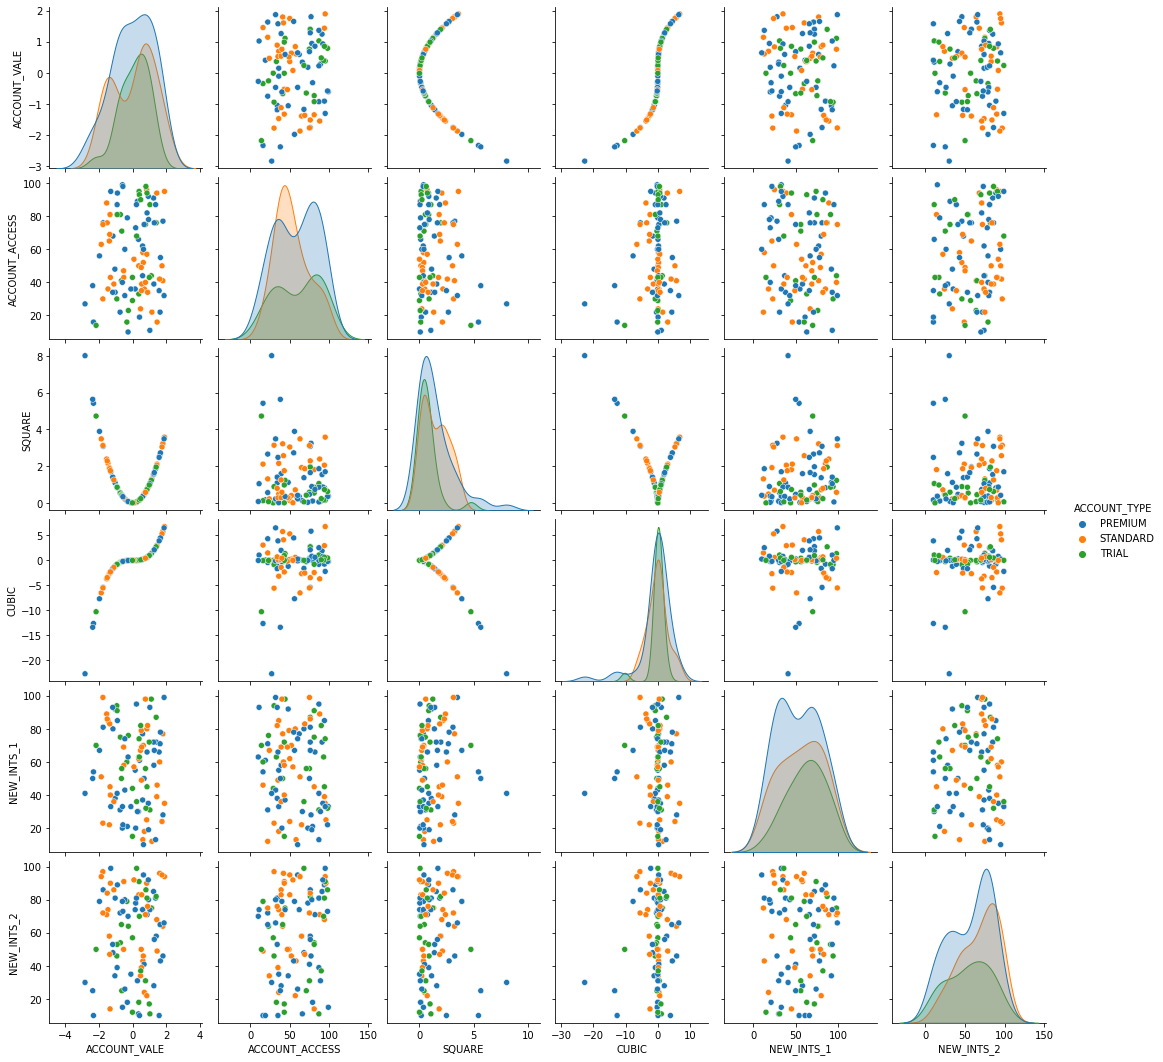

In [27]:
sns.pairplot(data=new_df, hue='ACCOUNT_TYPE')

Also we can make joint graphs, that is, on the one hand, show a cloud of points between two variables and, at the same time, show their distributions. For this type of visualization, we have <code>**joinplot**</code>

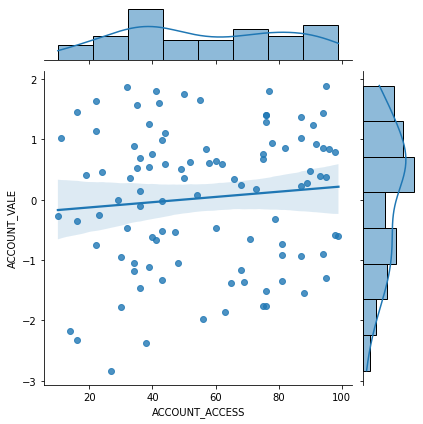

In [28]:
sns.jointplot(x='ACCOUNT_ACCESS', y='ACCOUNT_VALE', data=new_df, kind='reg')

If we have historical data we can use easily __`lineplot`__

In [29]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [30]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year'>

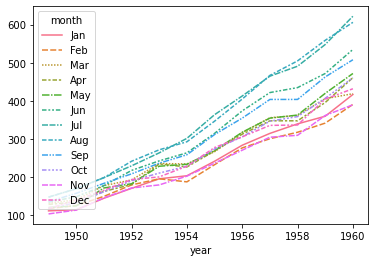

In [31]:
sns.lineplot(data=flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

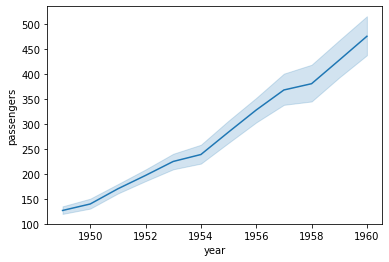

In [32]:
sns.lineplot(data=flights, x="year", y="passengers")

If you're working on a clustering project you can display easily a dengrogram like in agglomerative clustering with __`clustermap`__

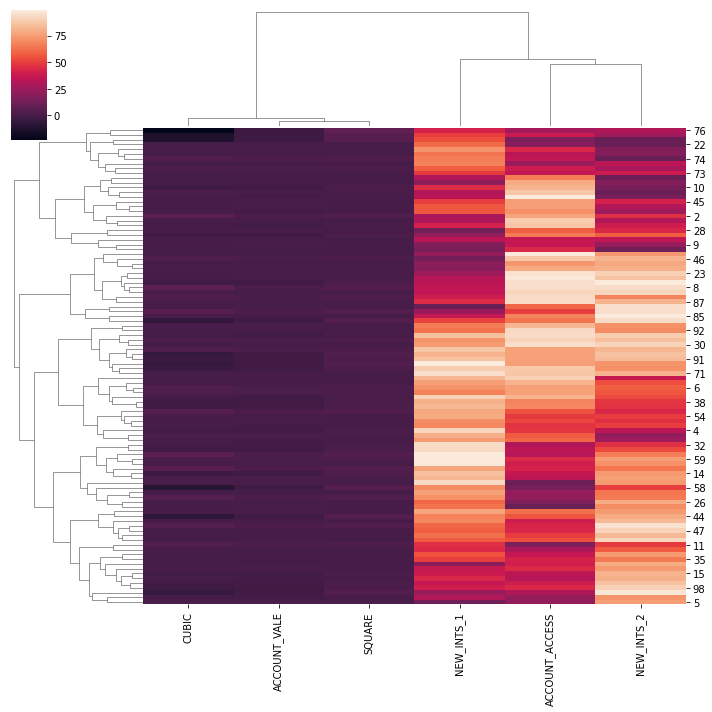

In [33]:
a = new_df.drop(["ACCOUNT_TYPE"], axis = 1, inplace=False)
sns.clustermap(a)